# 2b. RGS Data Reduction (Script 02b)

This section handles the reduction of the RGS data. This script is separate from the PN analysis and is designed to be run in stages.

Workflow:

    Run 1: I will run the script with CREATE_DIAGNOSTIC_PLOTS="yes" and APPLY_RGS_FILTER="no". This will:

        Generate the diagnostic "banana plots" (rgsimplot output).

        Create the individual RGS1 and RGS2 raw source lightcurves.

        Create the final, combined/corrected source lightcurve using rgslccorr.

        Create the background lightcurves (from CCD9) needed for flare-filtering.

    Inspect: I will display all these plots to check the region-centering, the final source lightcurve, and to check for background flares.

    Edit: Based on the flare plots, I will manually edit scripts/02b_rgs_reduction.sh to set APPLY_RGS_FILTER="yes" and a RGS_RATE_THRESHOLD.

    Run 2: I will re-run this notebook cell. The script will then generate GTIs and re-run rgsproc to create the final, filtered RGS spectra.

In [1]:
import os
from PIL import Image
from IPython.display import Image as IPyImage, display
from io import BytesIO

# Get Project Root and ObsID from the environment
os.environ['PROJECT_ROOT'] = '/media/kyle/kyle_phd/Swift-j1858.6-0814/'
os.environ['OBSID'] = '/0865600201'
project_root = os.environ.get('PROJECT_ROOT')
obsid = os.environ.get('OBSID')

# Define paths for all plots this script will generate
plot_dir = f"{project_root}/products/{obsid}/rgs/plots"
diag1_plot = f"{plot_dir}/rgs1_diag_regions.png"
diag2_plot = f"{plot_dir}/rgs2_diag_regions.png"
src_lc_raw1_plot = f"{plot_dir}/rgs1_source_lc_raw.png"
src_lc_raw2_plot = f"{plot_dir}/rgs2_source_lc_raw.png"
src_lc_corr_plot = f"{plot_dir}/rgs_source_lc_corrected.png"
bkg1_plot = f"{plot_dir}/rgs1_bkg_lc.png"
bkg2_plot = f"{plot_dir}/rgs2_bkg_lc.png"

### 2b i. Run 1: Diagnostics and Lightcurves

I will now run the script for the first time. This will create all diagnostic plots and lightcurves.

In [6]:
!../scripts/02b_rgs_reduction.sh > logs/02b_rgs_reduction_run1.log 2>&1

### 2b ii. Sanity Check: Inspect Diagnostic Plots

First, I will check the diagnostic "banana plots" to ensure the source is correctly centered in the pipeline's spatial and order-sorting regions.

--- RGS1 Diagnostic Plot ---


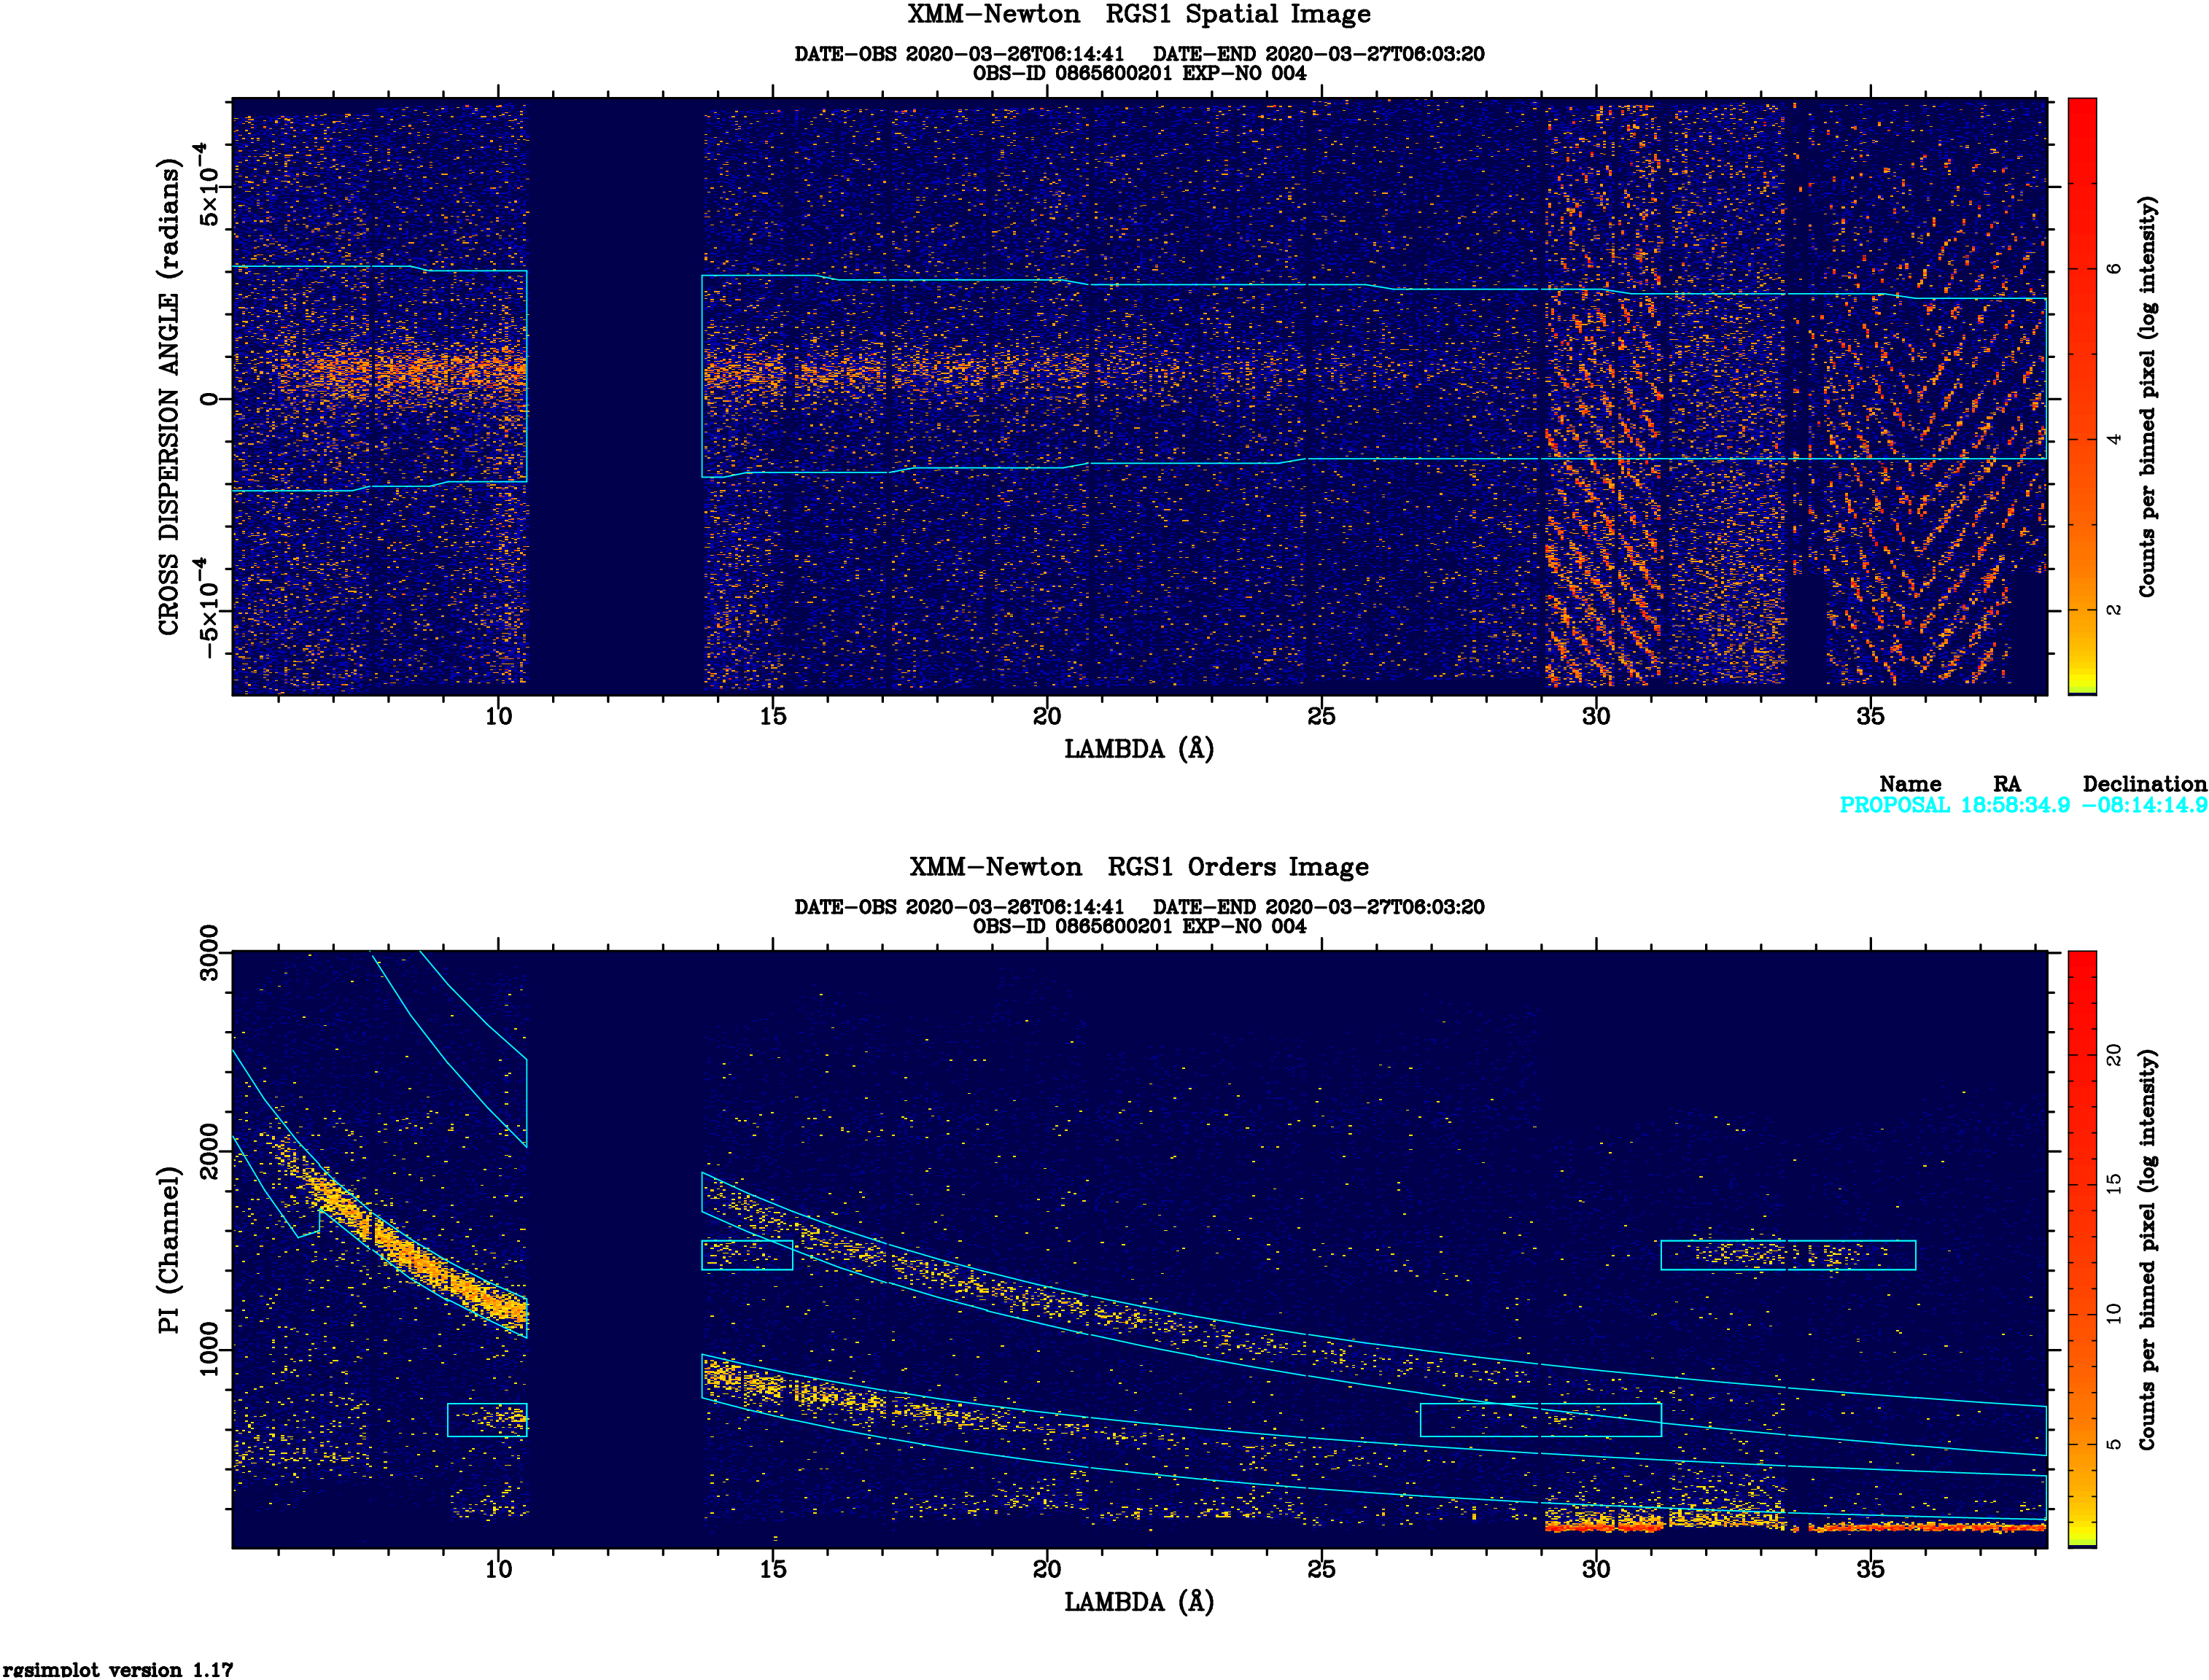


--- RGS2 Diagnostic Plot ---


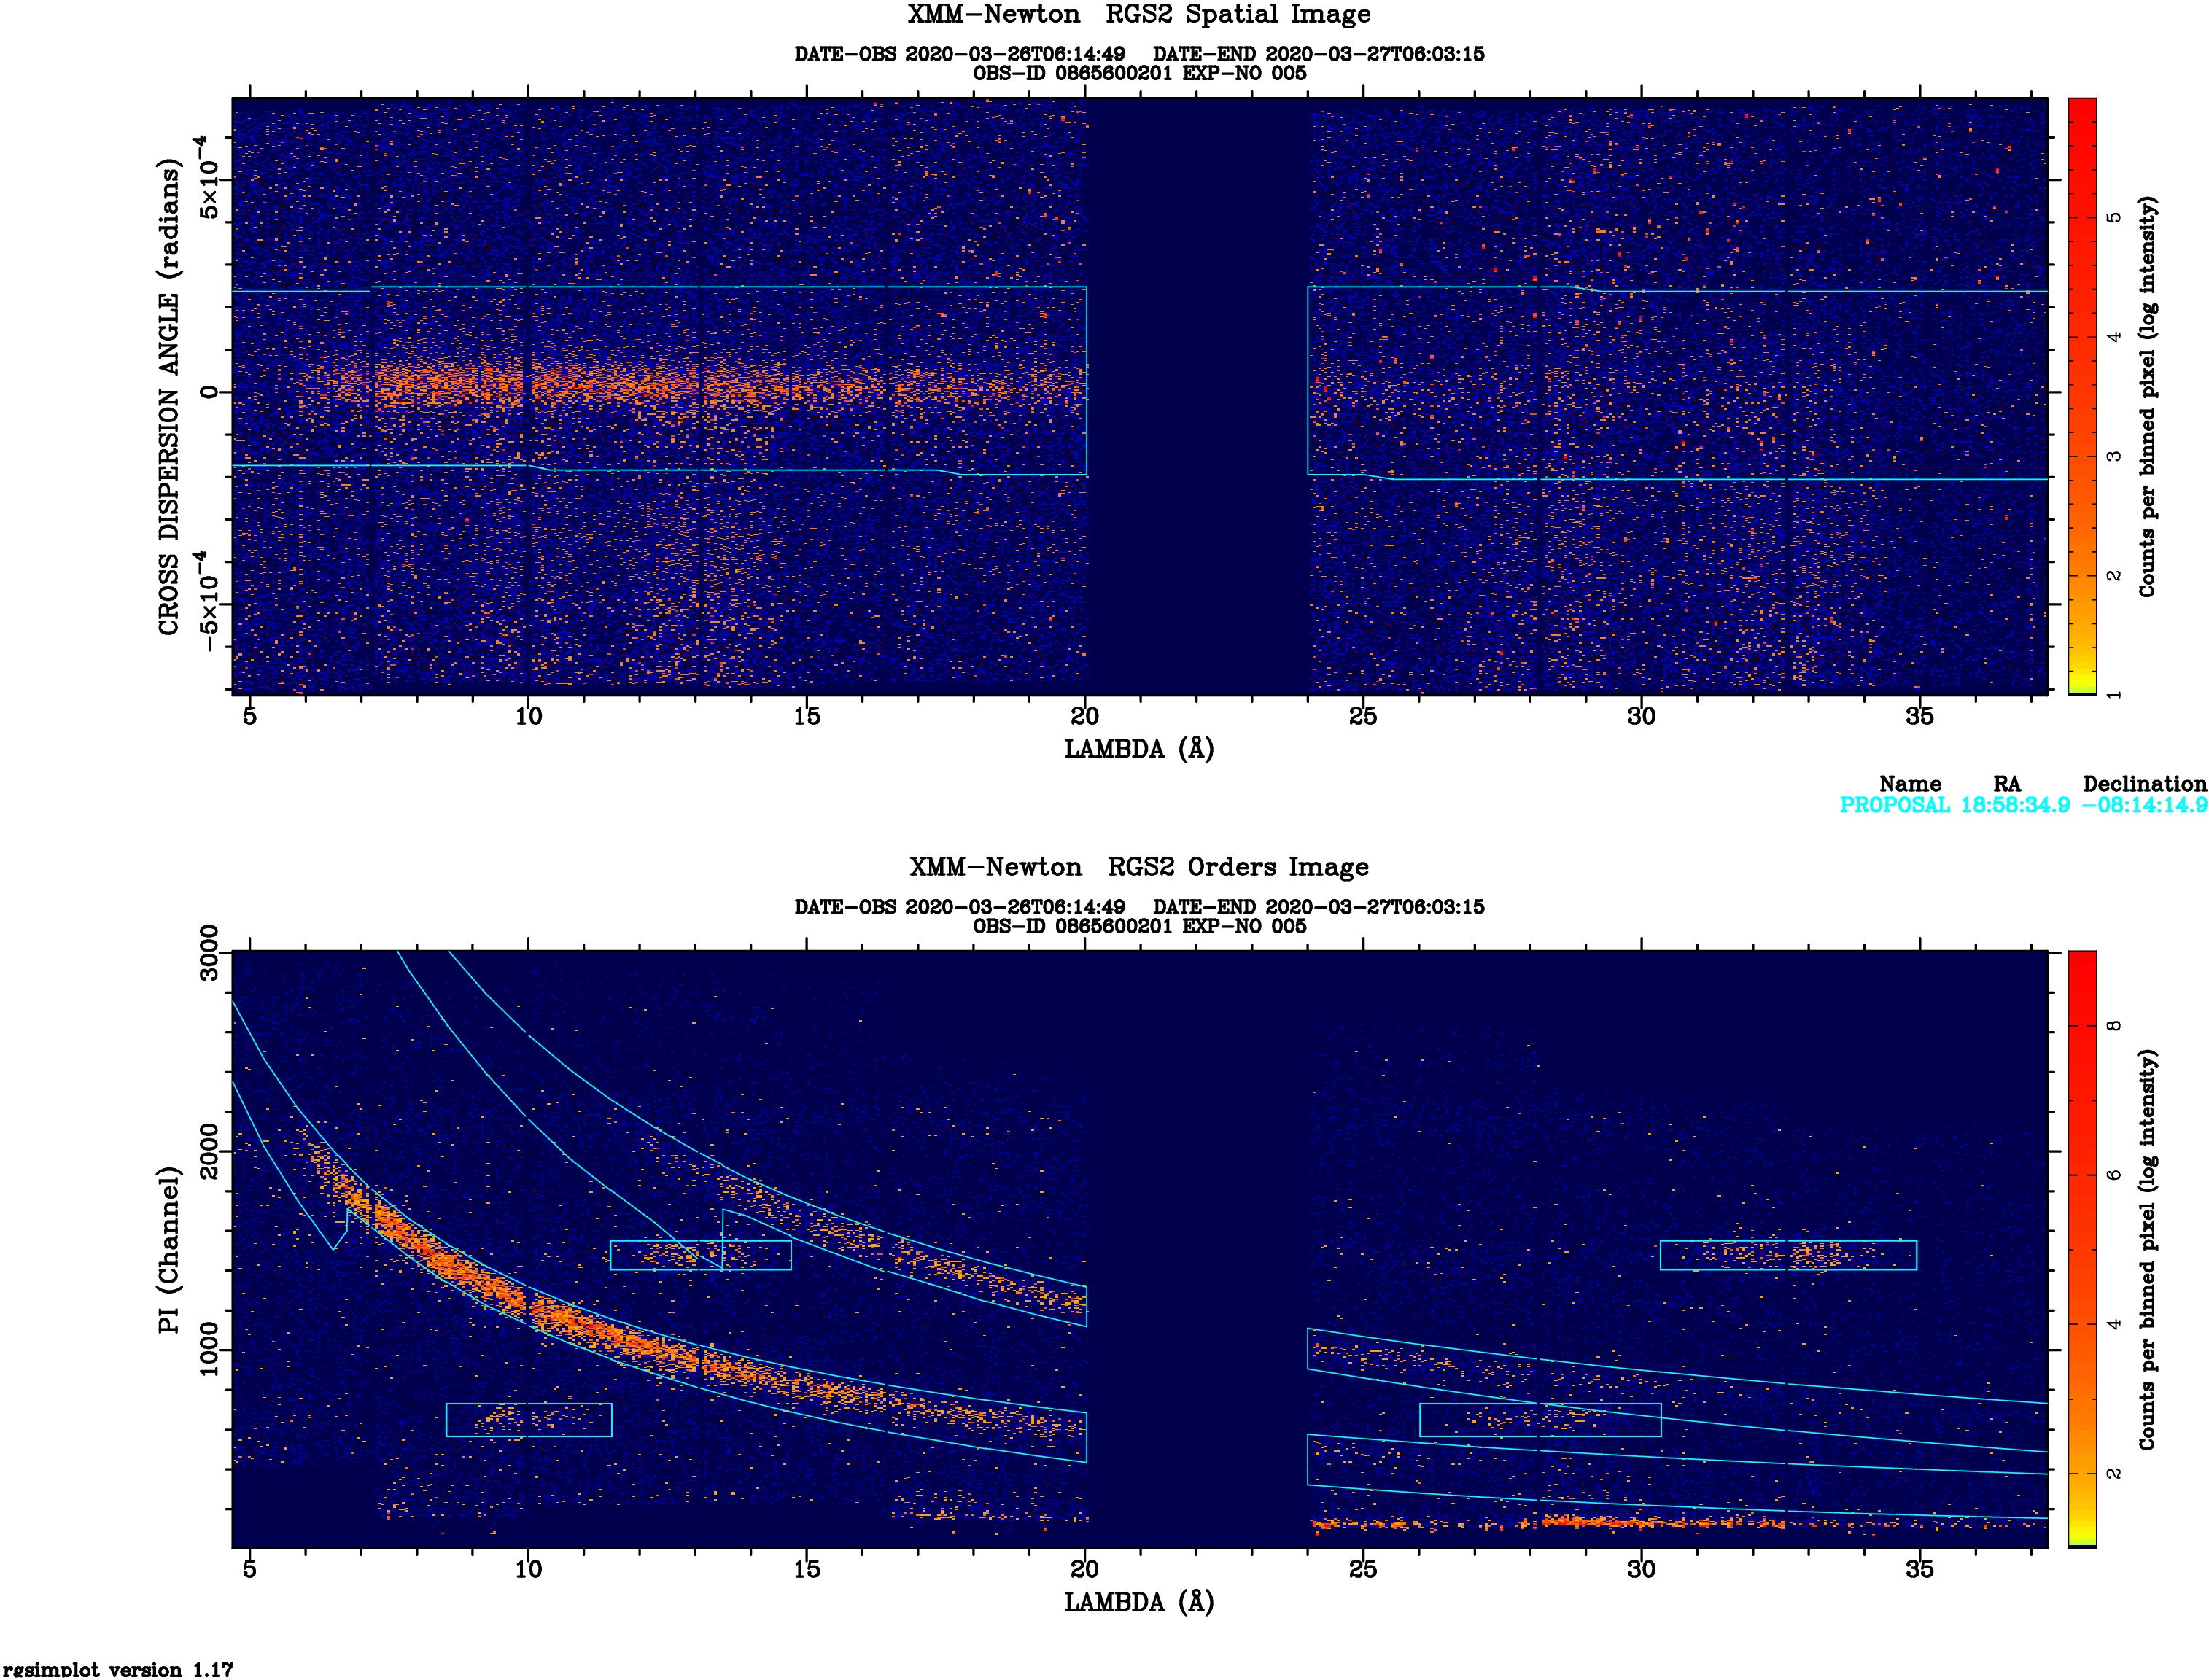

In [7]:
from PIL import Image
from IPython.display import Image as IPyImage, display
from io import BytesIO

print("--- RGS1 Diagnostic Plot ---")
if os.path.exists(diag1_plot):
    with Image.open(diag1_plot) as img:
        rotated = img.rotate(-90, expand=True)
        buf = BytesIO()
        rotated.save(buf, format='PNG')
        buf.seek(0)
        display(IPyImage(data=buf.getvalue(), width=800))
else:
    print(f"RGS1 plot not found (is CREATE_DIAGNOSTIC_PLOTS='yes'?)")

print("\n--- RGS2 Diagnostic Plot ---")
if os.path.exists(diag2_plot):
    with Image.open(diag2_plot) as img:
        rotated = img.rotate(-90, expand=True)
        buf = BytesIO()
        rotated.save(buf, format='PNG')
        buf.seek(0)
        display(IPyImage(data=buf.getvalue(), width=800))
else:
    print(f"RGS2 plot not found (is CREATE_DIAGNOSTIC_PLOTS='yes'?)")


2b iii. Sanity Check: Inspect Corrected Source Lightcurve

Next, I will check the final, combined (RGS1+RGS2, Order 1+2) source lightcurve generated by `rgslccorr`.

--- RGS1 Raw Source Lightcurve ---


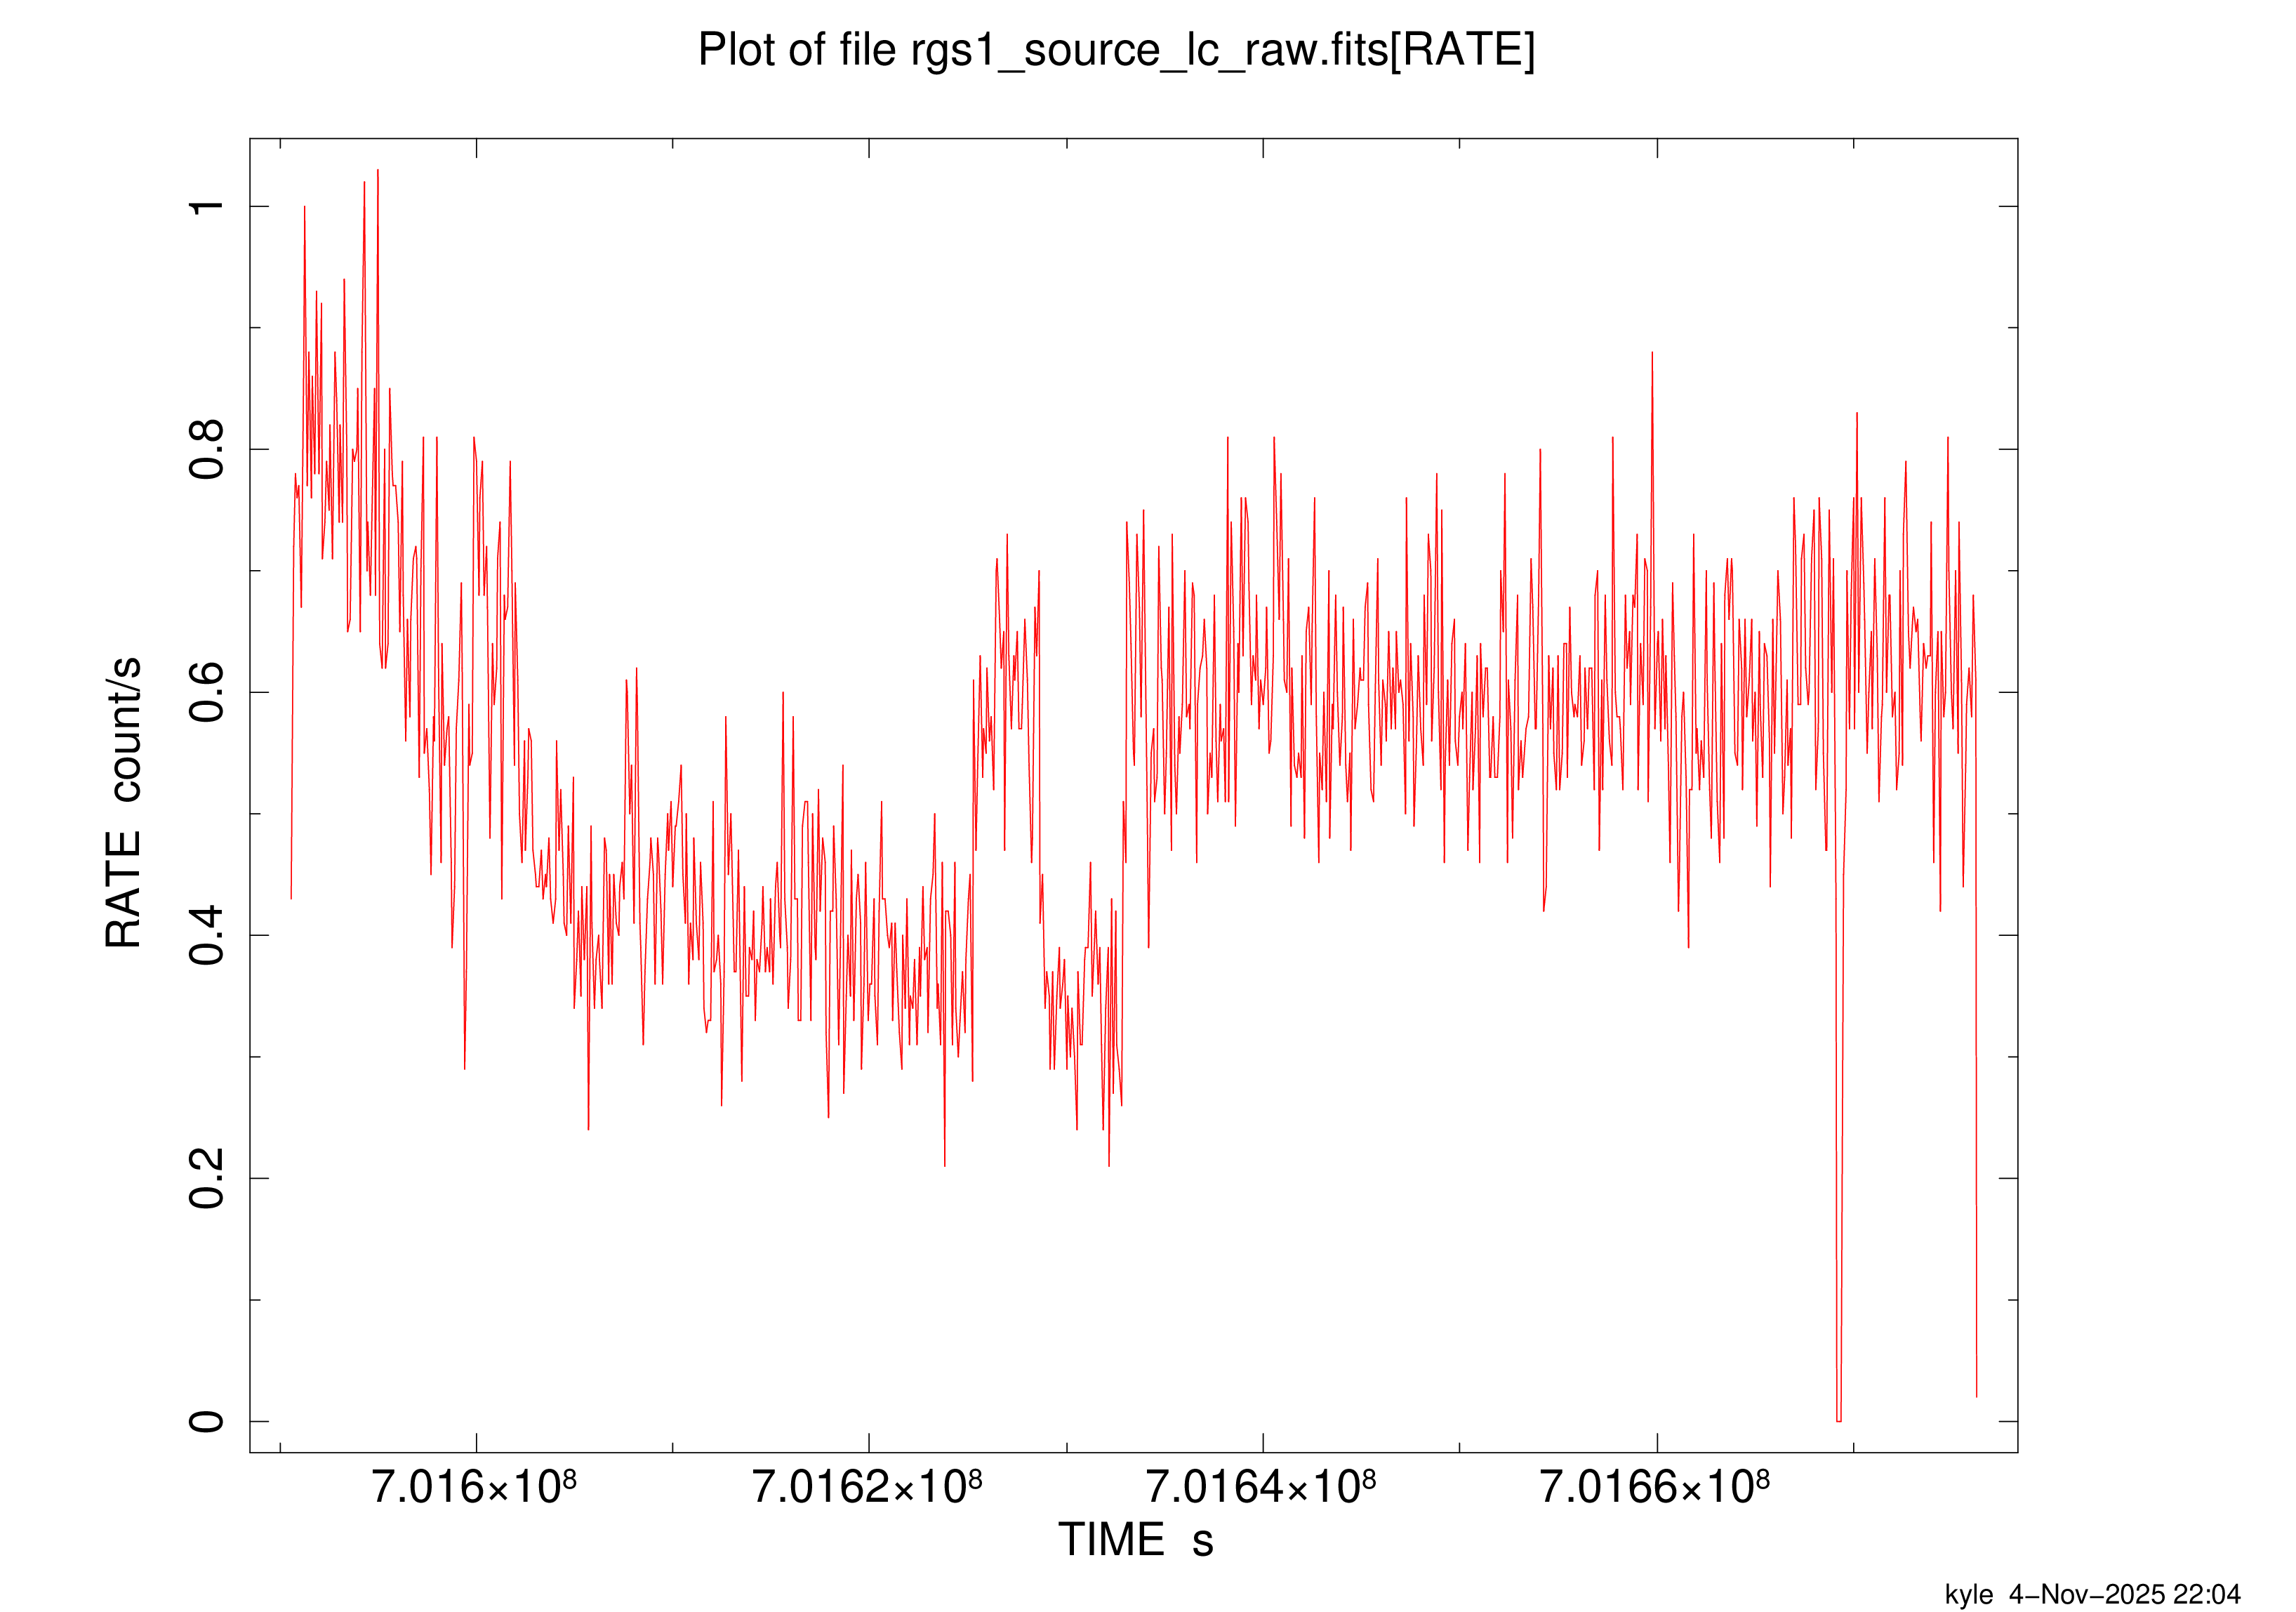

In [8]:
print("--- RGS1 Raw Source Lightcurve ---")
if os.path.exists(src_lc_raw1_plot):
    with Image.open(src_lc_raw1_plot) as img:
        rotated = img.rotate(-90, expand=True)
        buf = BytesIO()
        rotated = img.rotate(-90, expand=True).save(buf, format='PNG')
        buf.seek(0)
        display(IPyImage(data=buf.getvalue(), width=800))
else:
    print(f"RGS1 raw source plot not found.")

--- RGS2 Raw Source Lightcurve ---


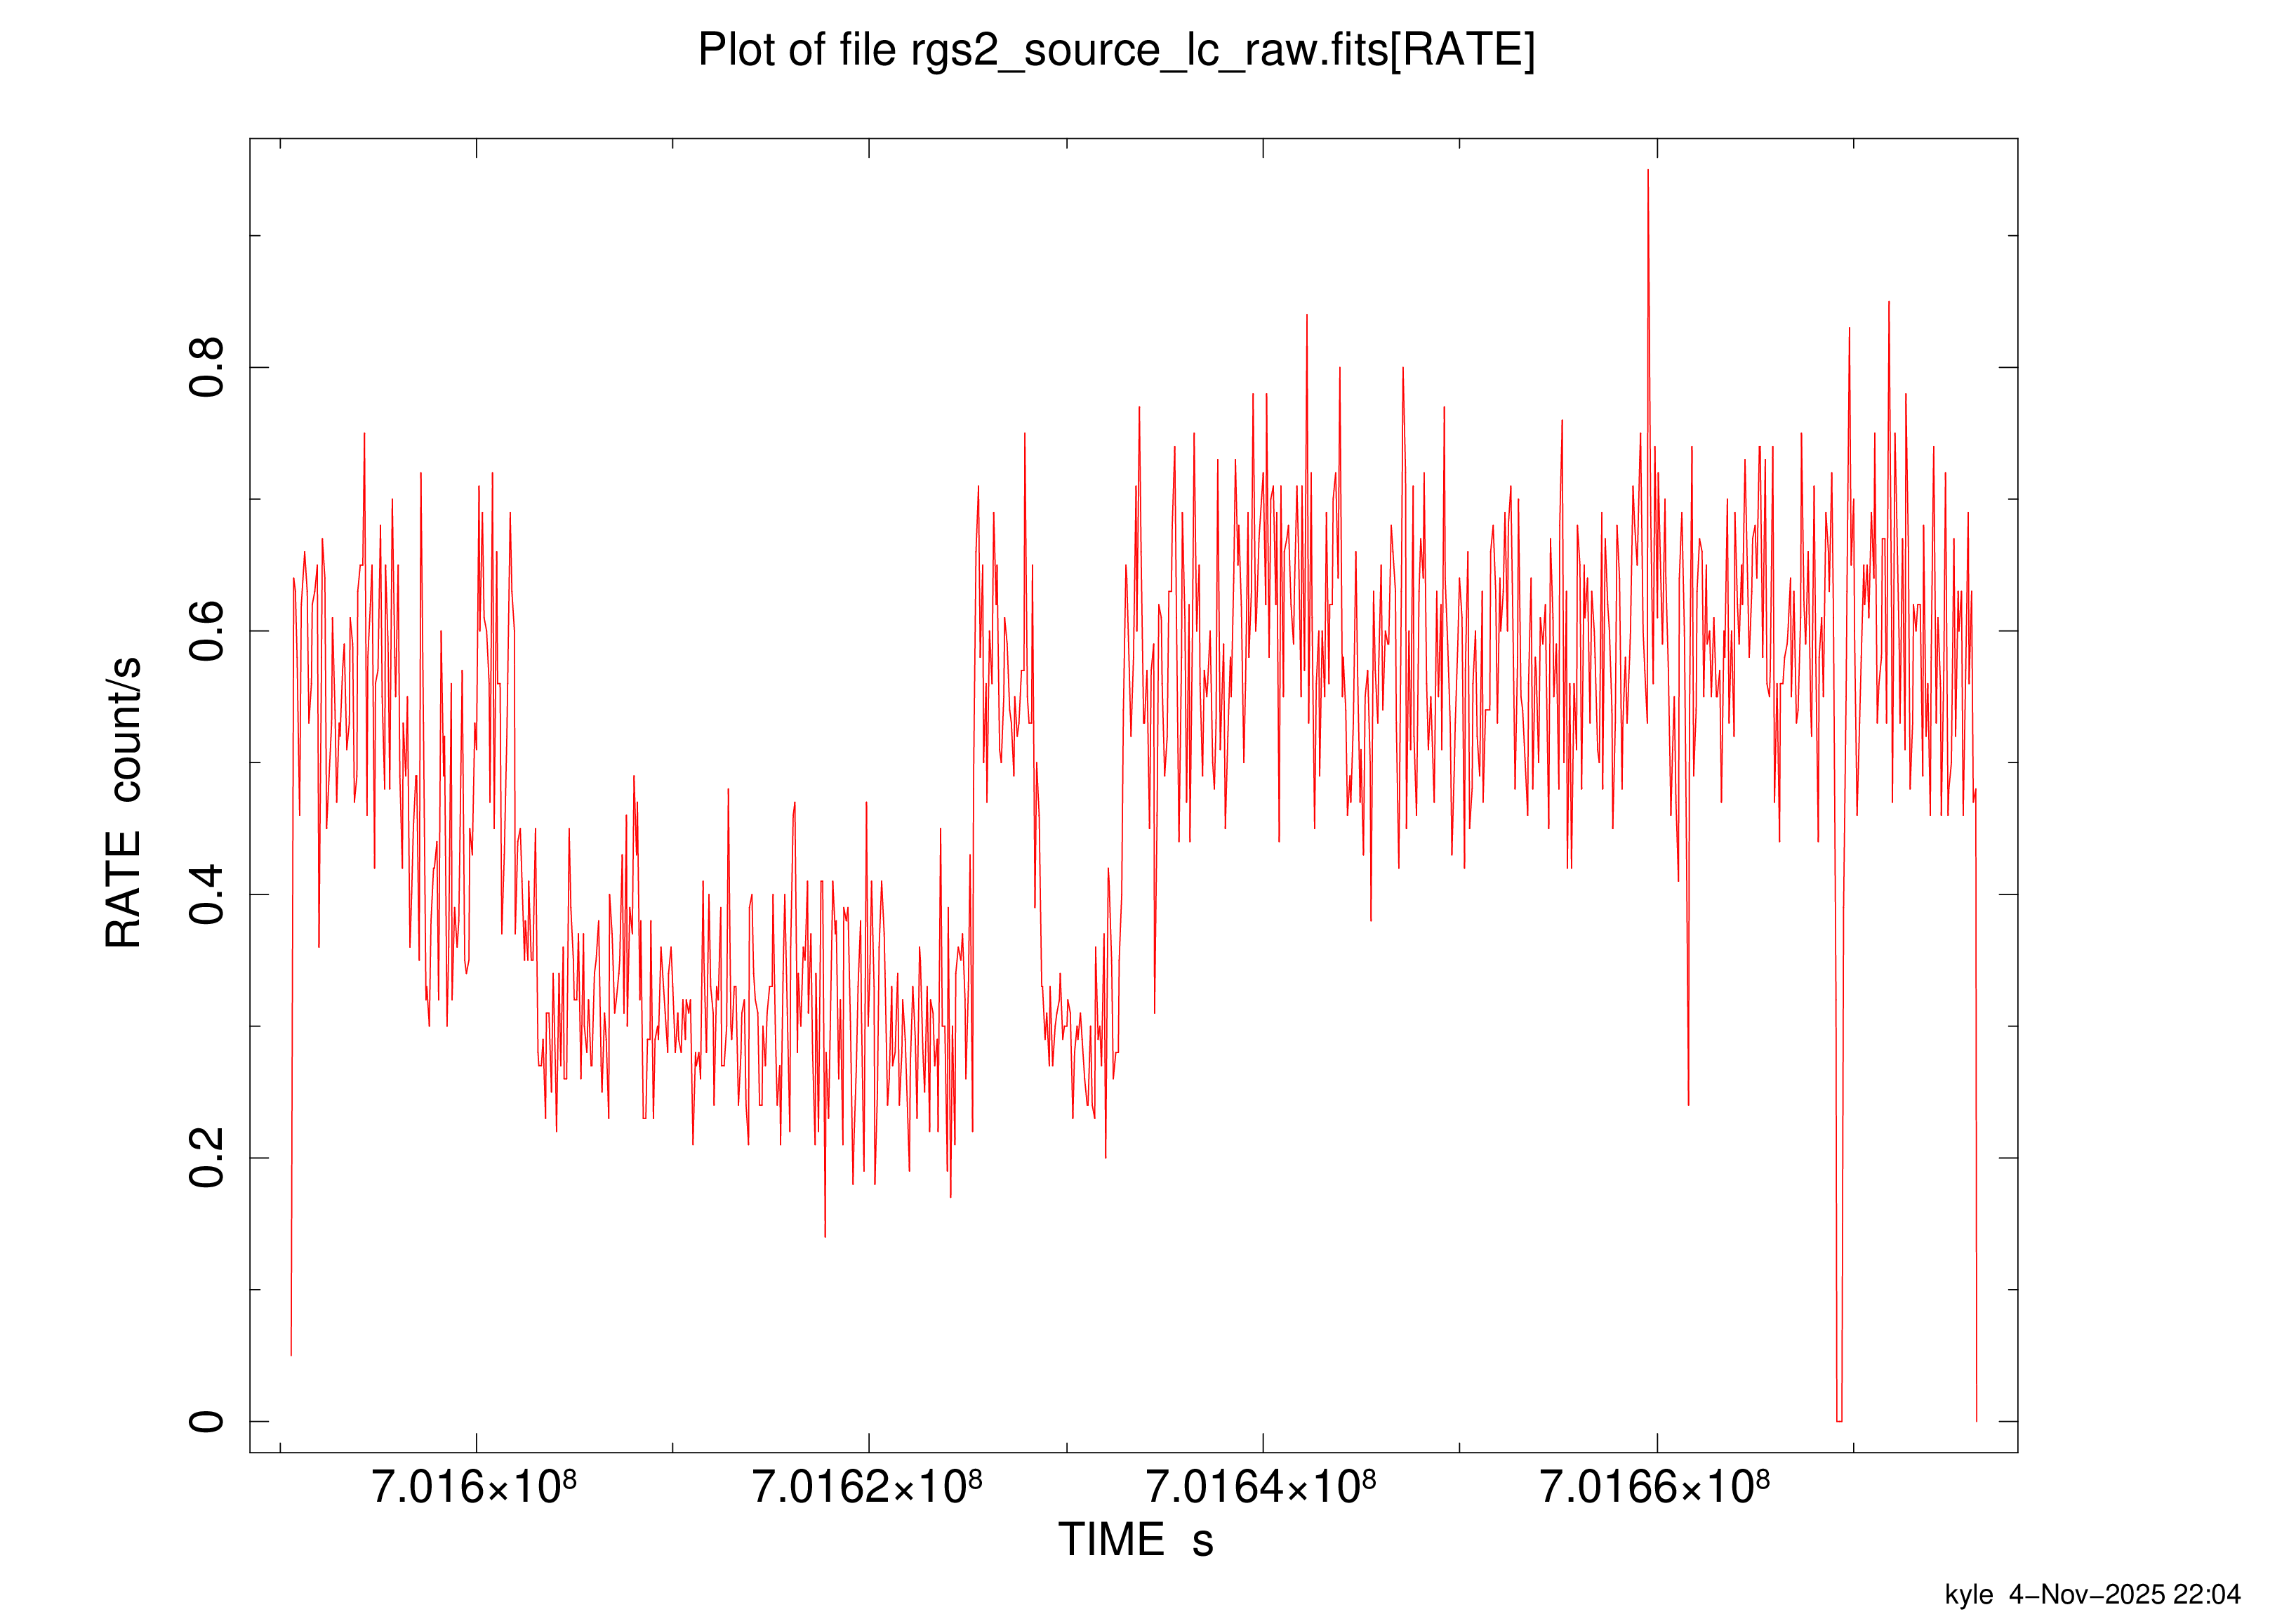

In [9]:
print("--- RGS2 Raw Source Lightcurve ---")
if os.path.exists(src_lc_raw2_plot):
    with Image.open(src_lc_raw2_plot) as img:
        rotated = img.rotate(-90, expand=True)
        buf = BytesIO()
        rotated.save(buf, format='PNG')
        buf.seek(0)
        display(IPyImage(data=buf.getvalue(), width=800))
else:
    print(f"RGS2 raw source plot not found.")

--- RGS Corrected Source Lightcurve ---


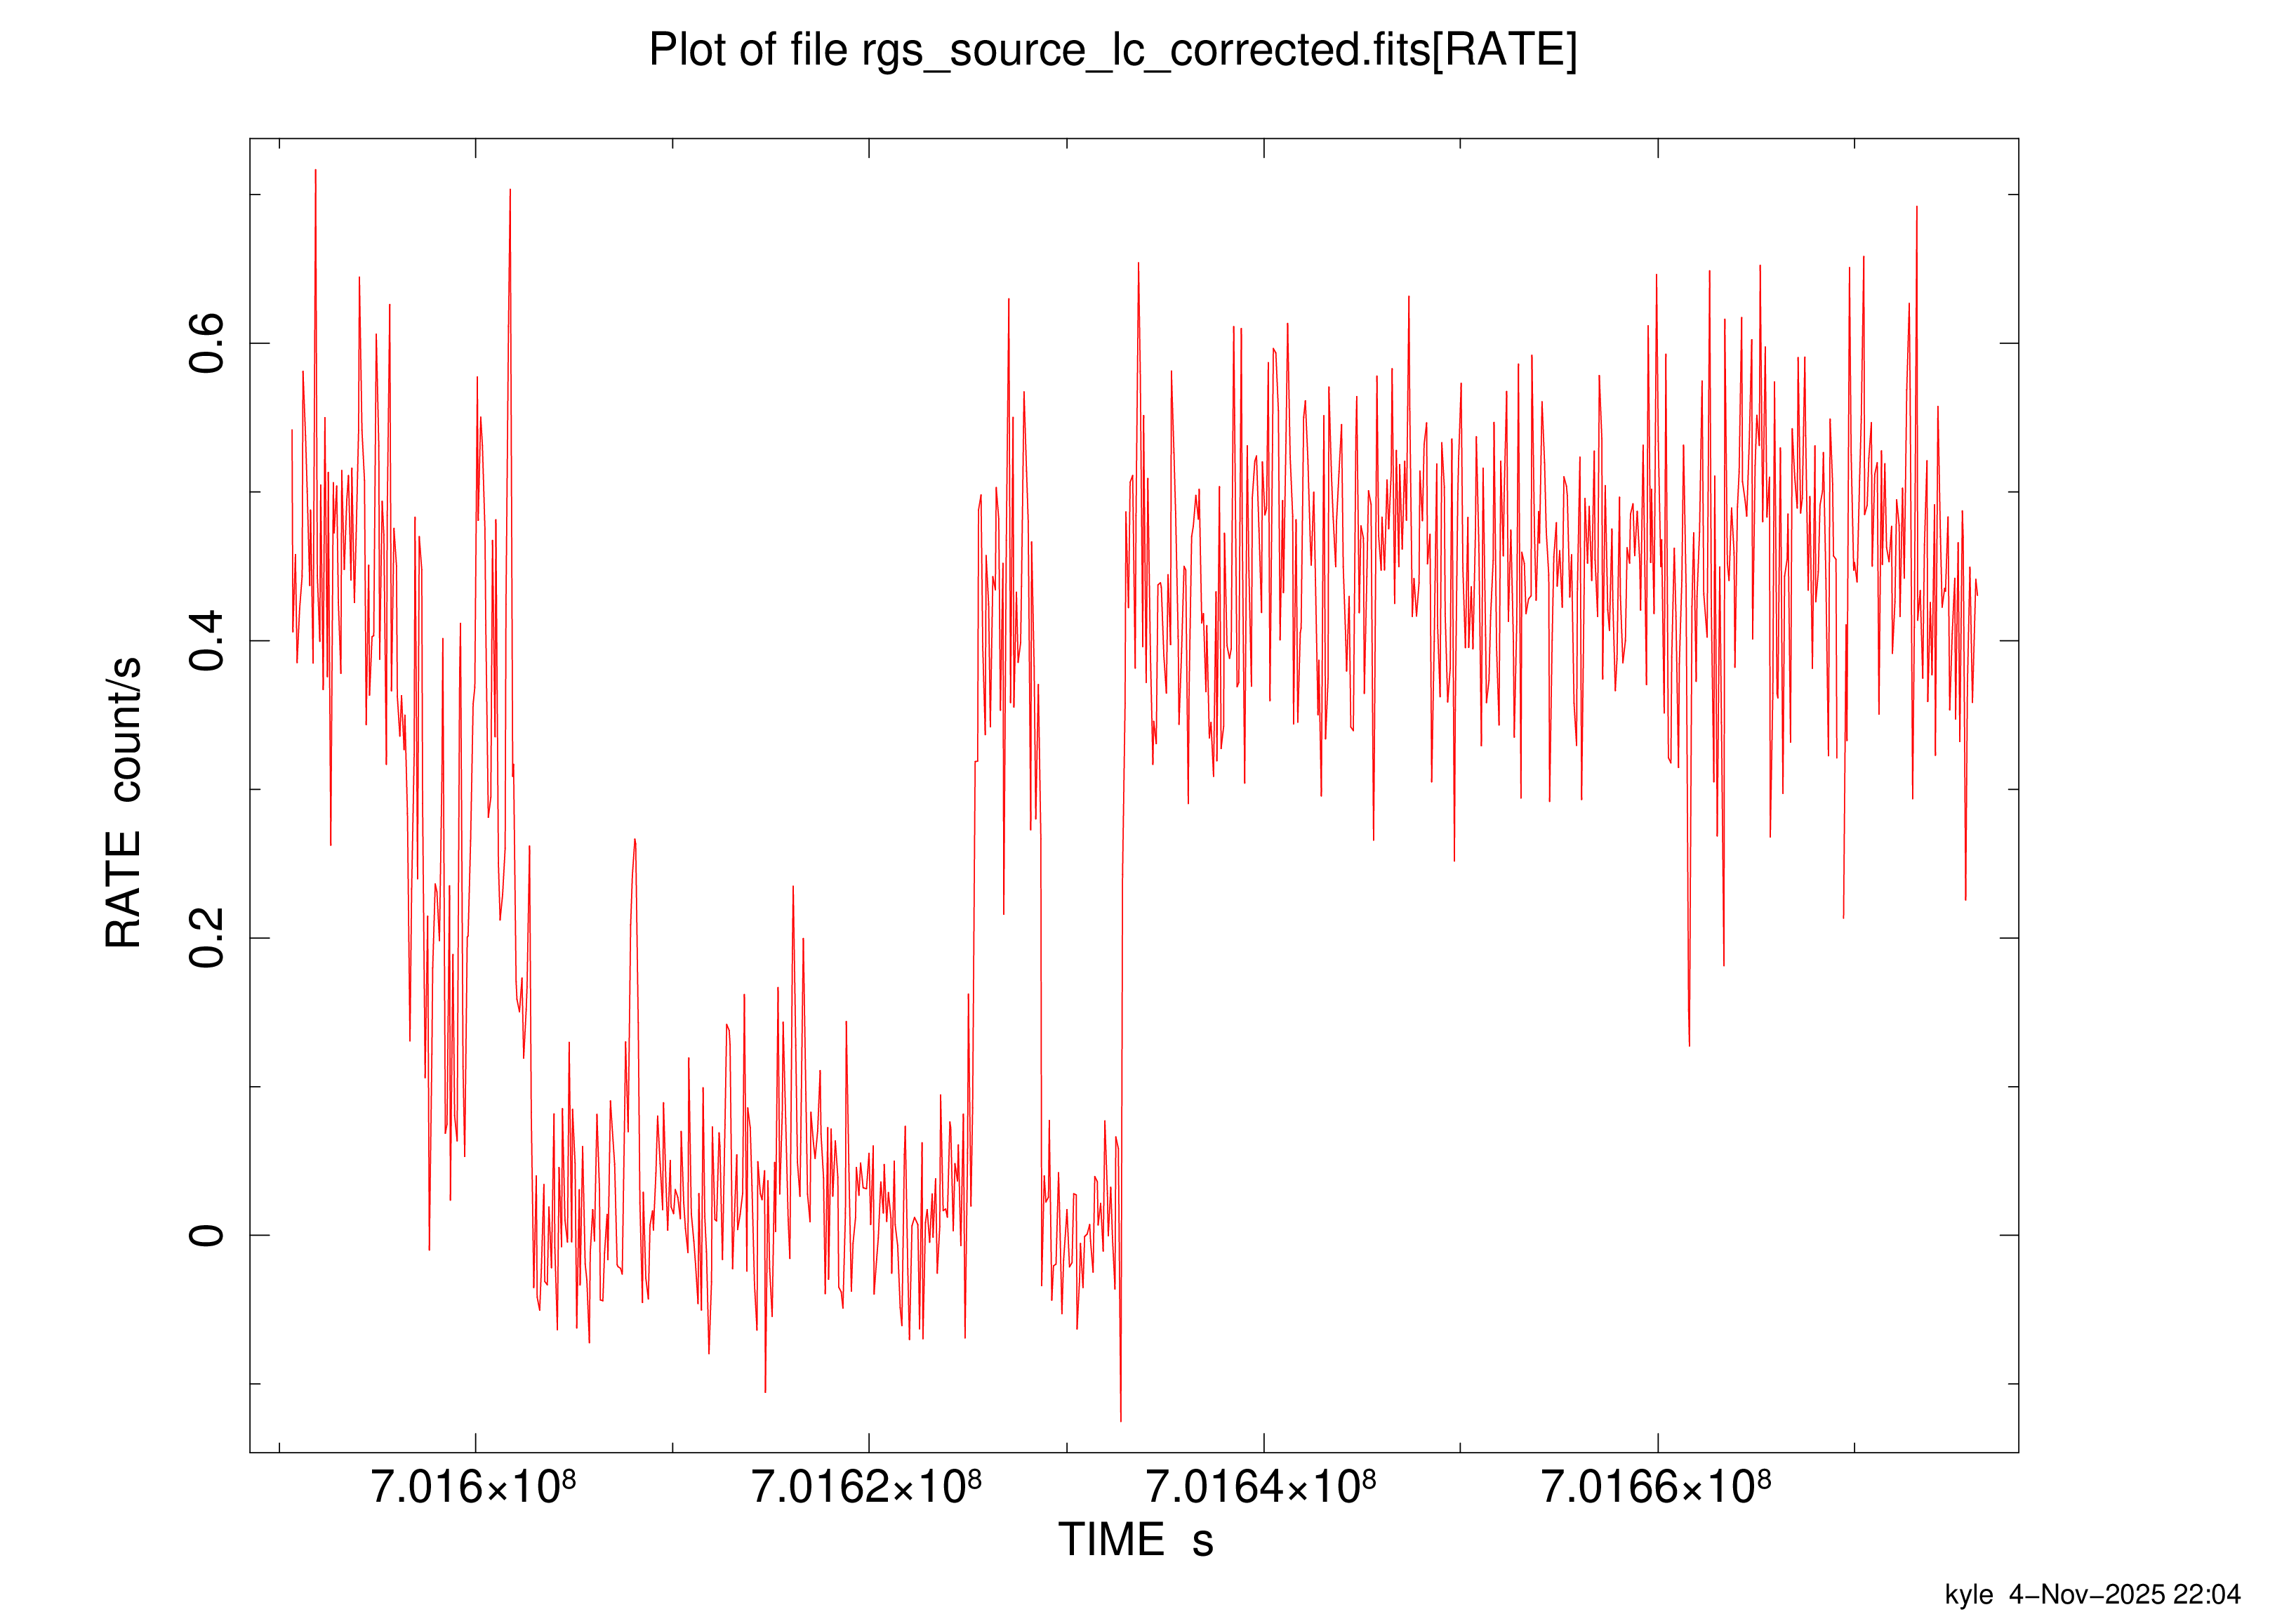

In [10]:
print("--- RGS Corrected Source Lightcurve ---")
if os.path.exists(src_lc_corr_plot):
    with Image.open(src_lc_corr_plot) as img:
        rotated = img.rotate(-90, expand=True)
        buf = BytesIO()
        rotated.save(buf, format='PNG')
        buf.seek(0)
        display(IPyImage(data=buf.getvalue(), width=800))
else:
    print(f"Source LC plot not found.")

The corrected RGS lightcurve looks reasonable.


2b iv. Flare Filtering: Inspect Background Lightcurves

Finally, I must inspect the CCD9 background lightcurves to check for particle flares.

--- RGS1 Background Flare Plot (CCD9) ---


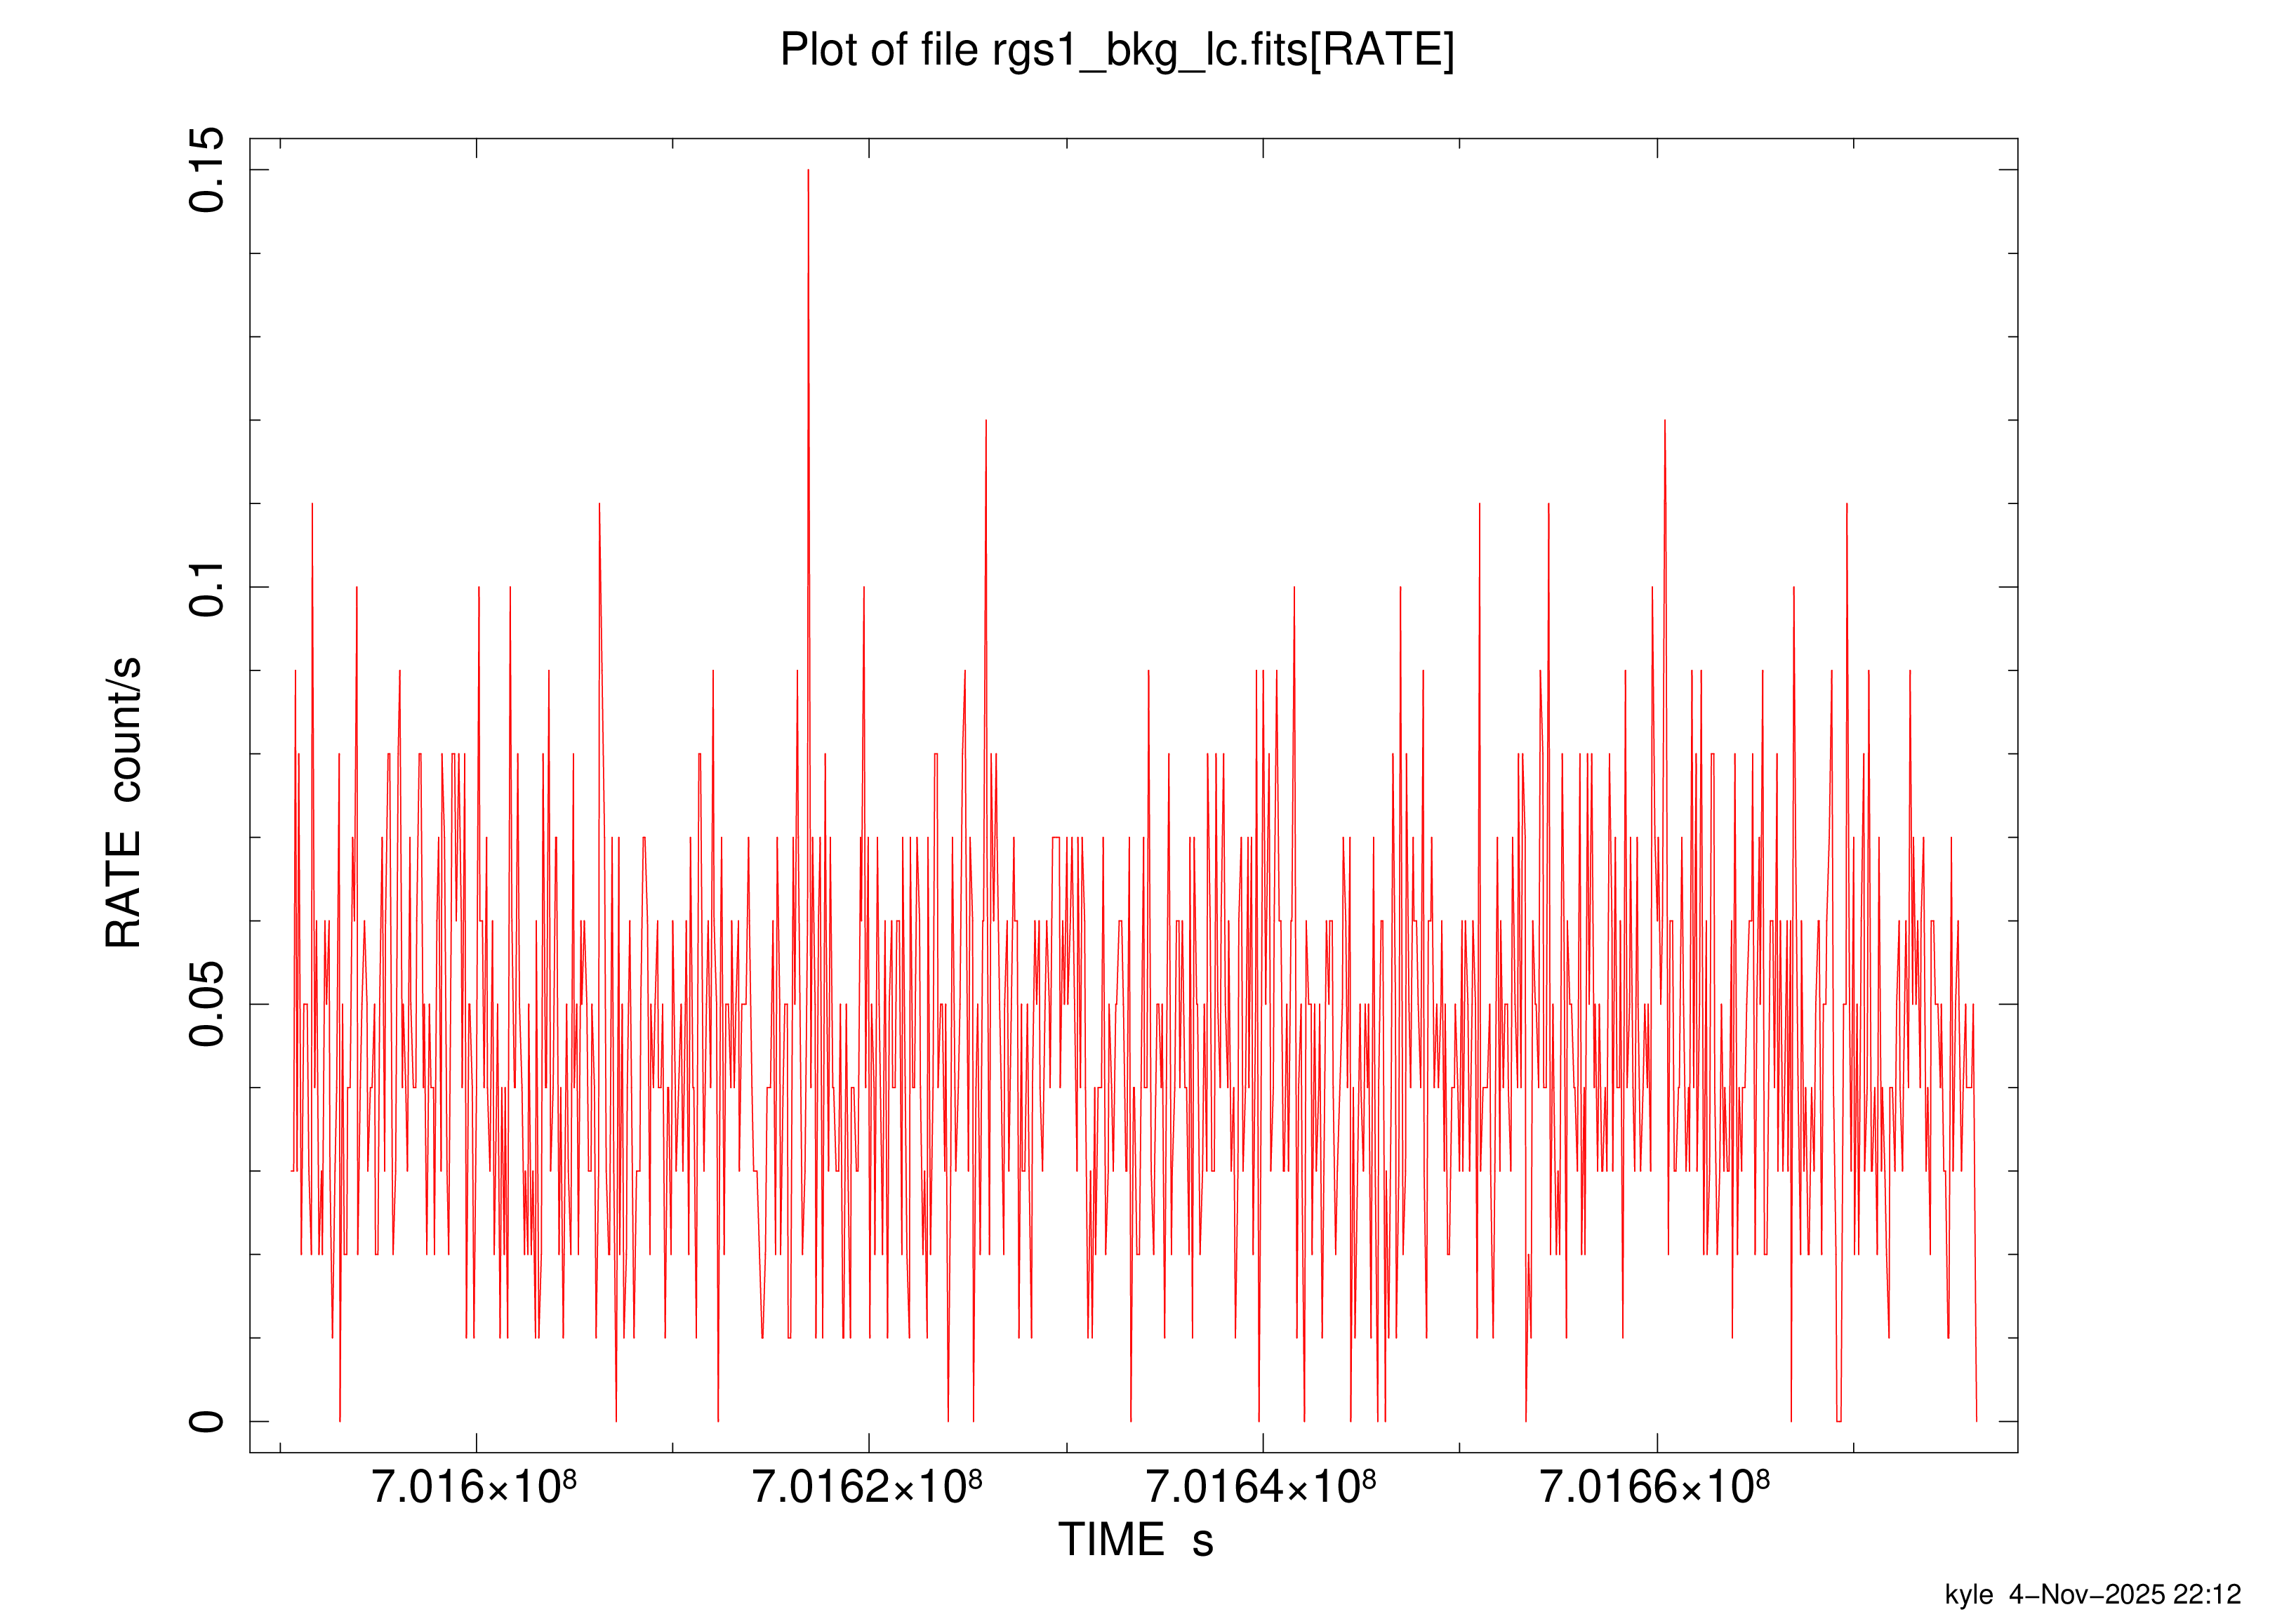


--- RGS2 Background Flare Plot (CCD9) ---


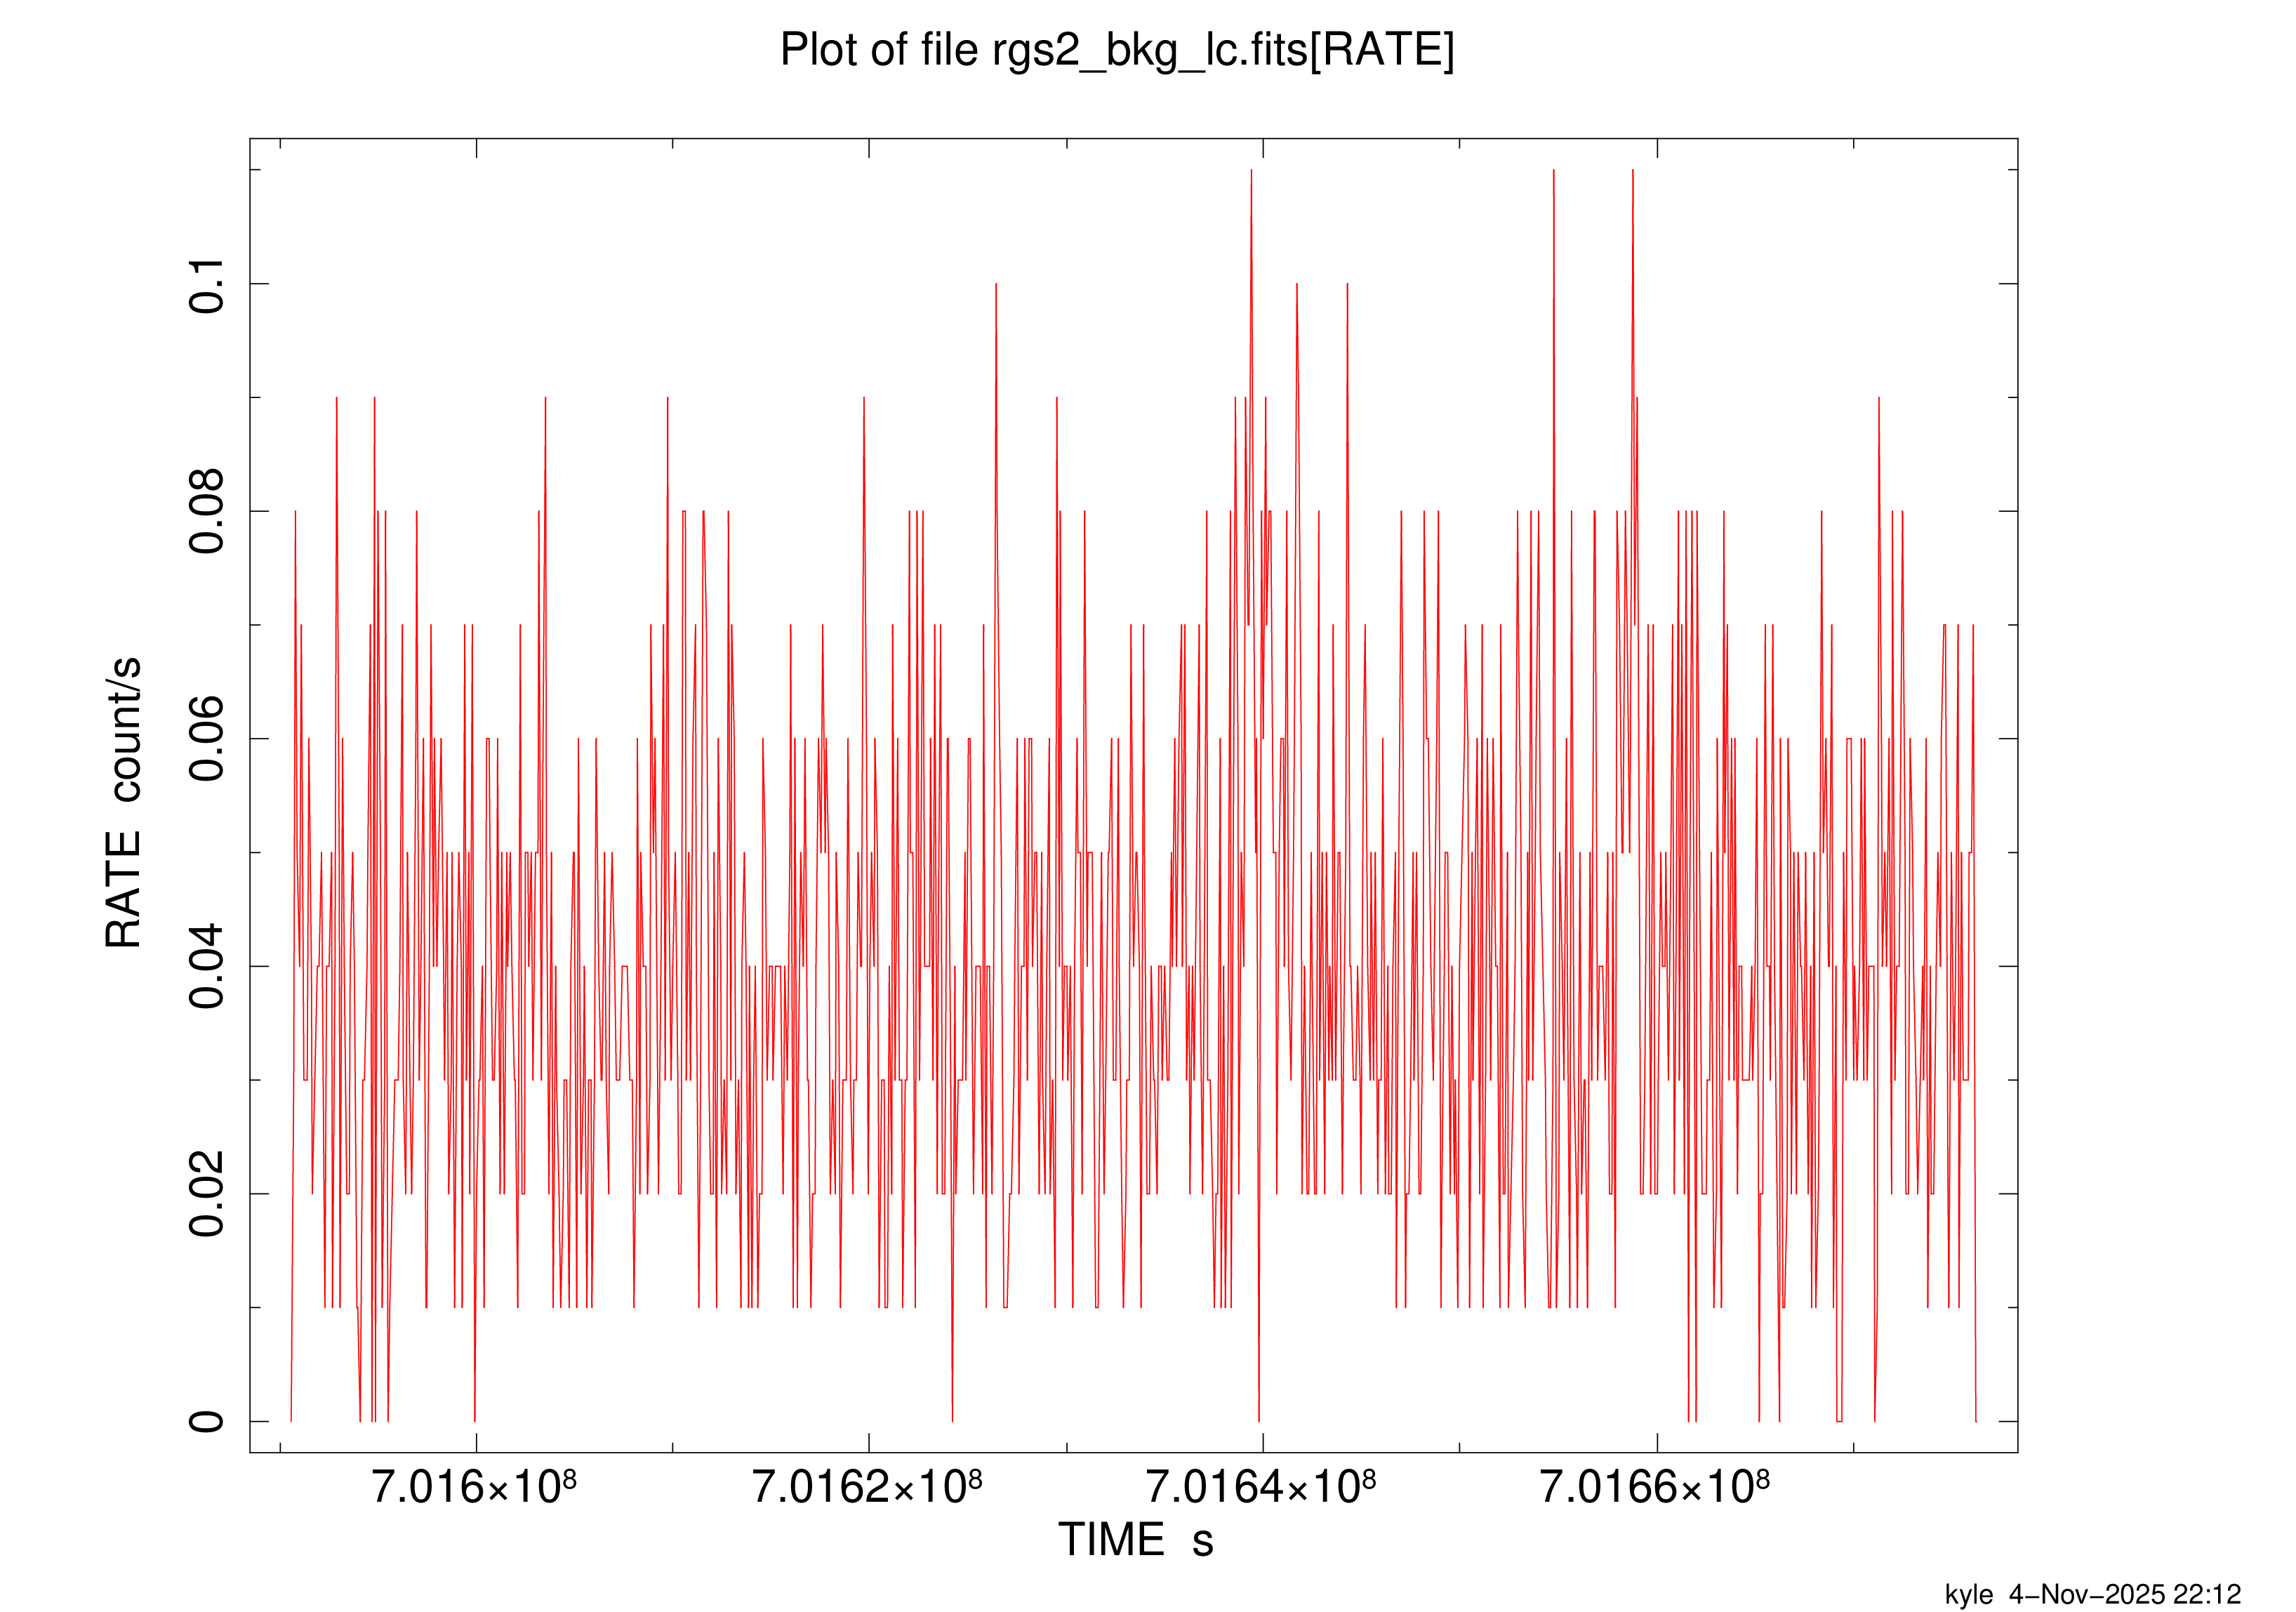

In [13]:
print("--- RGS1 Background Flare Plot (CCD9) ---")
if os.path.exists(bkg1_plot):
    with Image.open(bkg1_plot) as img:
        rotated = img.rotate(-90, expand=True)
        buf = BytesIO()
        rotated.save(buf, format='PNG')
        buf.seek(0)
        display(IPyImage(data=buf.getvalue(), width=800))
else:
    print(f"RGS1 background plot not found.")

print("\n--- RGS2 Background Flare Plot (CCD9) ---")
if os.path.exists(bkg2_plot):
    with Image.open(bkg2_plot) as img:
        rotated = img.rotate(-90, expand=True)
        buf = BytesIO()
        rotated.save(buf, format='PNG')
        buf.seek(0)
        display(IPyImage(data=buf.getvalue(), width=800))
else:
    print(f"RGS2 background plot not found.")


### 2b v. Decision and Script Edit

The background lightcurve for RGS2 show some flaring with rates jumping above ~0.12 cts/s. The quiescent background level appears to be below 0.1 cts/s.

Action: I will now manually edit scripts/02b_rgs_reduction.sh and change the "USER CONFIGURATION" section to:

    FILTER_RGS1="no"

    FILTER_RGS2="yes"

    RGS_RATE_THRESHOLD="0.12"



2b vi. Apply Flare Filtering: Run 2

Now that the script is modified, I will run it a second time. The script will detect APPLY_RGS_FILTER="yes", generate the GTI files, and re-run rgsproc from the filter stage onward to create the final, filtered science products.

In [12]:
!../scripts/02b_rgs_reduction.sh > logs/02b_rgs_reduction_run2.log 2>&1